<a href="https://colab.research.google.com/github/githubpradeep/notebooks/blob/main/background_removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://huggingface.co/briaai/RMBG-1.4
%cd RMBG-1.4/
!pip install -r requirements.txt

In [1]:
%cd RMBG-1.4/

/content/RMBG-1.4


In [2]:
from skimage import io
import torch, os

In [6]:
from PIL import Image
from briarmbg import BriaRMBG
from utilities import preprocess_image, postprocess_image
from huggingface_hub import hf_hub_download

In [4]:
!wget https://www.gimp.org/tutorials/Changing_Background_Color_2/img1_initial.jpg

--2024-02-09 01:59:36--  https://www.gimp.org/tutorials/Changing_Background_Color_2/img1_initial.jpg
Resolving www.gimp.org (www.gimp.org)... 151.101.1.91, 151.101.129.91, 151.101.193.91, ...
Connecting to www.gimp.org (www.gimp.org)|151.101.1.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18571 (18K) [image/jpeg]
Saving to: ‘img1_initial.jpg’

img1_initial.jpg    100%[===================>]  18.14K  --.-KB/s    in 0.009s  

2024-02-09 01:59:36 (2.08 MB/s) - ‘img1_initial.jpg’ saved [18571/18571]



In [7]:
im_path = 'img1_initial.jpg'

In [8]:
import skimage
net = BriaRMBG()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = BriaRMBG.from_pretrained("briaai/RMBG-1.4")
net.to(device)
net.eval()

# prepare input
model_input_size = [1024,1024]
orig_im = io.imread(im_path)
orig_im_size = orig_im.shape[0:2]
image = preprocess_image(orig_im, model_input_size).to(device)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/177M [00:00<?, ?B/s]

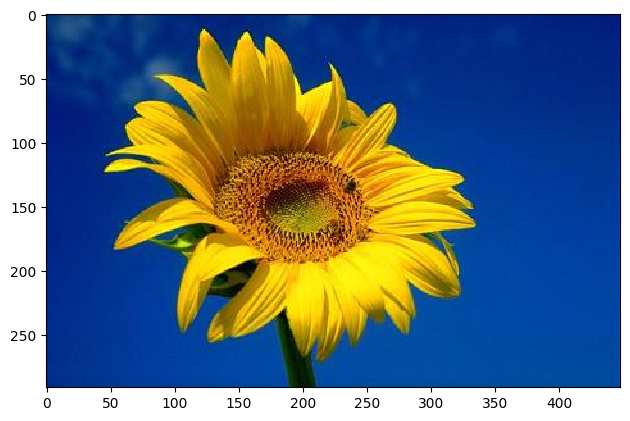

In [9]:
io.imshow(orig_im)


In [10]:
# inference
result=net(image)

# post process
result_image = postprocess_image(result[0][0], orig_im_size)

# save result
pil_im = Image.fromarray(result_image)

In [16]:
no_bg_image = Image.new("RGBA", pil_im.size, (0,0,0,0))
orig_image = Image.open(im_path)
no_bg_image.paste(orig_image, mask=pil_im)
no_bg_image.save("example_image_no_bg.png")

In [22]:
no_bg_image = io.imread("example_image_no_bg.png")

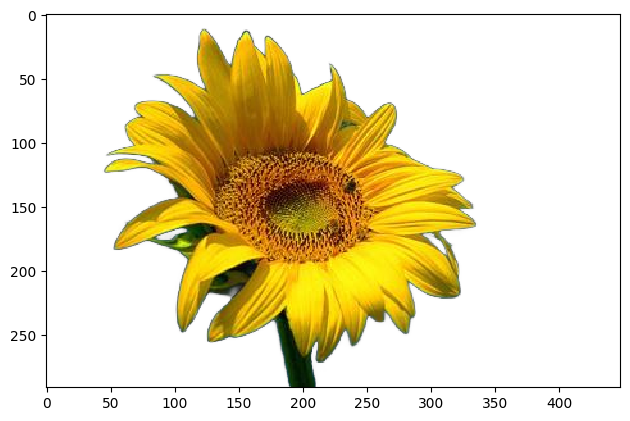

In [23]:
io.imshow(no_bg_image)